In [1]:
import pandas as pd

# Load the CSV files
natural_disturbance_df = pd.read_csv('/Users/yanlei/Documents/PhD/postdoc_3B/NEON_download/naturalDisturbance.csv')
chemistry_df = pd.read_csv('/Users/yanlei/Documents/PhD/postdoc_3B/NEON_download/slsChemistry_grazing_disturbance.csv')

# Preview the datasets to understand their structure
natural_disturbance_df.head(), chemistry_df.head()

# Extract siteID and associated wind disturbance startDates
disturbance_dates_df = natural_disturbance_df[['siteID', 'startDate']].drop_duplicates()

# Convert startDate to datetime for proper handling
disturbance_dates_df['startDate'] = pd.to_datetime(disturbance_dates_df['startDate'], errors='coerce').dt.date

# Group by siteID and aggregate disturbance dates into lists
site_disturbance_dates = disturbance_dates_df.groupby('siteID')['startDate'].apply(list).reset_index()

# Prepare the second dataframe (chemistry data) for plotting
chemistry_df['startDate'] = pd.to_datetime(chemistry_df['startDate'], errors='coerce').dt.date
chemistry_df['organicCPercent'] = pd.to_numeric(chemistry_df['organicCPercent'], errors='coerce')

# Display site-disturbance dates
site_disturbance_dates


/var/folders/vn/9hl_w2d11hl2hq3wmj3lr2f00000gn/T/ipykernel_6642/281832745.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  disturbance_dates_df['startDate'] = pd.to_datetime(disturbance_dates_df['startDate'], errors='coerce').dt.date


,siteID,startDate
0,ABBY,"[2016-10-01, 2016-10-31, 2016-11-30, 2016-12-30]"
1,ARIK,"[2017-02-01, 2023-06-23]"
2,BART,"[2019-10-29, 2023-06-01, 2023-07-01, 2023-07-3..."
3,BIGC,[2020-04-05]
4,BLAN,[2018-05-16]
5,BLDE,[2022-06-12]
6,BLUE,"[2017-07-01, 2018-05-02, 2018-05-19, 2018-08-1..."
7,BONA,[2019-04-03]
8,CLBJ,[2017-09-26]
9,COMO,"[2019-05-01, 2019-06-03, 2019-05-31, 2019-06-30]"


In [2]:
import seaborn as sns
# Re-filter sites again
valid_plots = []

for site in site_disturbance_dates['siteID'].unique():
    chemistry_site_df = chemistry_df[chemistry_df['plotID'].str.contains(site, na=False)]

    if chemistry_site_df.empty:
        continue

    disturbance_dates = site_disturbance_dates[site_disturbance_dates['siteID'] == site]['startDate'].values[0]
    for plot in chemistry_site_df['plotID'].unique():
        plot_df = chemistry_site_df[chemistry_site_df['plotID'] == plot]
        min_date = plot_df['startDate'].min()
        max_date = plot_df['startDate'].max()
    # Make sure we only compare valid dates
        if pd.isnull(min_date) or pd.isnull(max_date):
            continue

        if any(min_date <= date <= max_date for date in disturbance_dates if pd.notnull(date)):
            valid_plots.append(plot)

print(valid_plots)

['DSNY_041', 'DSNY_005', 'DSNY_003', 'DSNY_001', 'DSNY_009', 'DSNY_004', 'DSNY_043', 'DSNY_044', 'DSNY_042', 'DSNY_006', 'JERC_003', 'JERC_047', 'JERC_002', 'JERC_006', 'JERC_048', 'JERC_001', 'JERC_005', 'JERC_049', 'SCBI_045', 'SCBI_004', 'SCBI_006', 'SCBI_003', 'SCBI_005', 'SCBI_067', 'SCBI_049', 'SCBI_047', 'SCBI_008']


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import warnings
import math

warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

def analyze_plot_SOC(plot, chemistry_df, site_disturbance_dates, years_offset=10):
    result = {}

    chemistry_plot_df = chemistry_df[chemistry_df['plotID'] == plot].copy()
    chemistry_plot_df['HorizonType'] = chemistry_plot_df['sampleID'].apply(
        lambda x: 'O' if 'O' in str(x) else ('M' if 'M' in str(x) else 'Unknown')
    )

    # Handle disturbance dates
    disturbance_dates_raw = site_disturbance_dates[site_disturbance_dates['siteID'] == plot[:4]]['startDate'].values[0]
    disturbance_dates = pd.to_datetime(disturbance_dates_raw, errors='coerce')
    disturbance_dates = disturbance_dates.sort_values()

    # Process datetime columns
    chemistry_plot_df["collect_datetime"] = pd.to_datetime(chemistry_plot_df["collectDate"], errors='coerce').dt.tz_localize(None)
    chemistry_plot_df["collect_month"] = chemistry_plot_df["collect_datetime"].dt.to_period('M').dt.to_timestamp()

    earliest_date = chemistry_plot_df["collect_month"].min()
    latest_date = chemistry_plot_df["collect_month"].max()

    earliest_disturbance = disturbance_dates[disturbance_dates >= earliest_date].min()
    latest_disturbance = disturbance_dates[disturbance_dates <= latest_date].max()

    offset = pd.DateOffset(years=years_offset)
    before_start = earliest_disturbance - offset
    before_end = earliest_disturbance
    after_start = latest_disturbance
    after_end = latest_disturbance + offset

    def label_period(row):
        if before_start <= row['collect_month'] < before_end:
            return 'Before'
        elif after_start <= row['collect_month'] < after_end:
            return 'After'
        else:
            return 'Outside'

    chemistry_plot_df['period'] = chemistry_plot_df.apply(label_period, axis=1)

    # Plot
    fig, ax = plt.subplots(figsize=(10, 6))

    for horizon in ['M', 'O']:
        df = chemistry_plot_df[chemistry_plot_df['HorizonType'] == horizon]
        if not df.empty:
            grouped = df.groupby('collect_month')['organicCPercent'].apply(lambda x: x.dropna().tolist())
            grouped = grouped[grouped.apply(len) > 0]
            dates = grouped.index
            data = grouped.values
            if len(data) > 0:
                ax.boxplot(data, positions=mdates.date2num(dates), widths=50)
                ax.set_xlim([dates.min() - pd.Timedelta(weeks=30), dates.max() + pd.Timedelta(weeks=30)])

    sns.scatterplot(
        data=chemistry_plot_df,
        x='collect_datetime',
        y='organicCPercent',
        hue='HorizonType',
        ax=ax
    )

    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.xticks(rotation=45)
    ax.axvline(mdates.date2num(earliest_disturbance), color='red', linestyle='--', label='Earliest Disturbance')
    ax.axvline(mdates.date2num(latest_disturbance), color='red', linestyle='--', alpha=0.5, label='Latest Disturbance')
    ax.set_xlabel("Collection Month")
    ax.set_ylabel("Organic C Percent")
    ax.legend()
    plt.tight_layout()
    plt.show()

    # Before/After means
    chemistry_plot_df_M = chemistry_plot_df[chemistry_plot_df['HorizonType'] == 'M']
    chemistry_plot_df_O = chemistry_plot_df[chemistry_plot_df['HorizonType'] == 'O']

    grouped_means_M = chemistry_plot_df_M[chemistry_plot_df_M['period'].isin(['Before', 'After'])] \
        .groupby('period')['organicCPercent'].mean()
    grouped_means_O = chemistry_plot_df_O[chemistry_plot_df_O['period'].isin(['Before', 'After'])] \
        .groupby('period')['organicCPercent'].mean()

    result = {
        'plotID': plot,
        'earliest_disturbance': earliest_disturbance,
        'latest_disturbance': latest_disturbance,
        'mean_before_O': grouped_means_O.get('Before', float('nan')),
        'mean_after_O': grouped_means_O.get('After', float('nan')),
        'mean_before_M': grouped_means_M.get('Before', float('nan')),
        'mean_after_M': grouped_means_M.get('After', float('nan')),
        'years_offset_before': years_offset
    }

    # Year-since-disturbance processing
    chemistry_plot_df['years_since_disturbance'] = (
        (chemistry_plot_df['collect_month'] - latest_disturbance).dt.days / 365.25
    ).apply(lambda x: math.ceil(x) if pd.notnull(x) and x >= 0 else pd.NA)

    chemistry_plot_df['year_since'] = chemistry_plot_df['years_since_disturbance'].where(
        chemistry_plot_df['years_since_disturbance'].between(1, 20), pd.NA
    )

    def get_yearly_soc(horizon_type):
        df = chemistry_plot_df[
            (chemistry_plot_df['HorizonType'] == horizon_type) & 
            (chemistry_plot_df['year_since'].notna())
        ]
        grouped = df.groupby('year_since')['organicCPercent'].mean()
        renamed = grouped.reindex(range(1, 21), fill_value=pd.NA)
        renamed.index = [f"{horizon_type}_after_{i}" for i in renamed.index]
        return renamed

    soc_O = get_yearly_soc('O')
    soc_M = get_yearly_soc('M')

    result.update(soc_O.to_dict())
    result.update(soc_M.to_dict())

    return result


Processing plot: DSNY_041


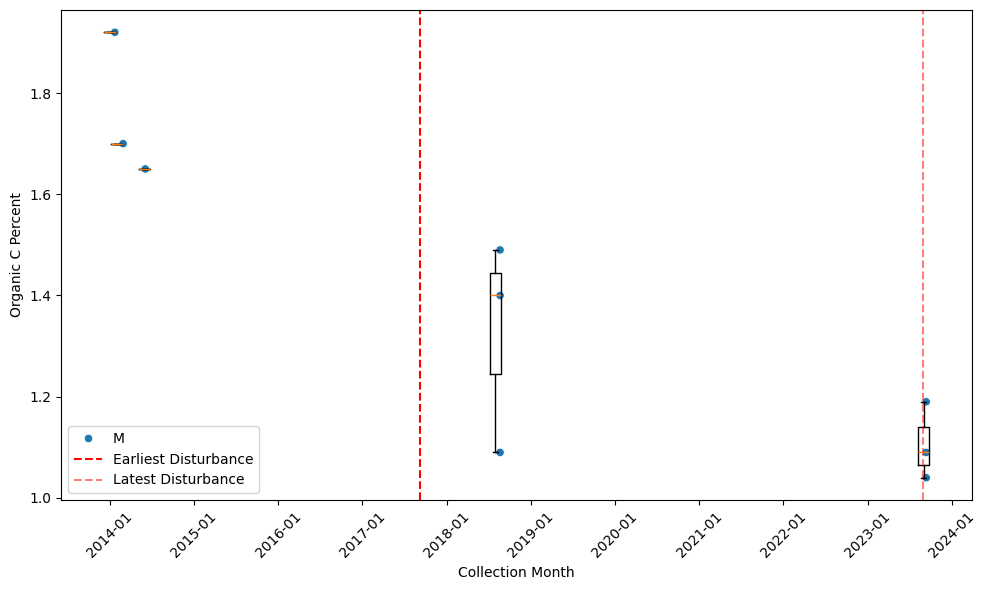

Processing plot: DSNY_005


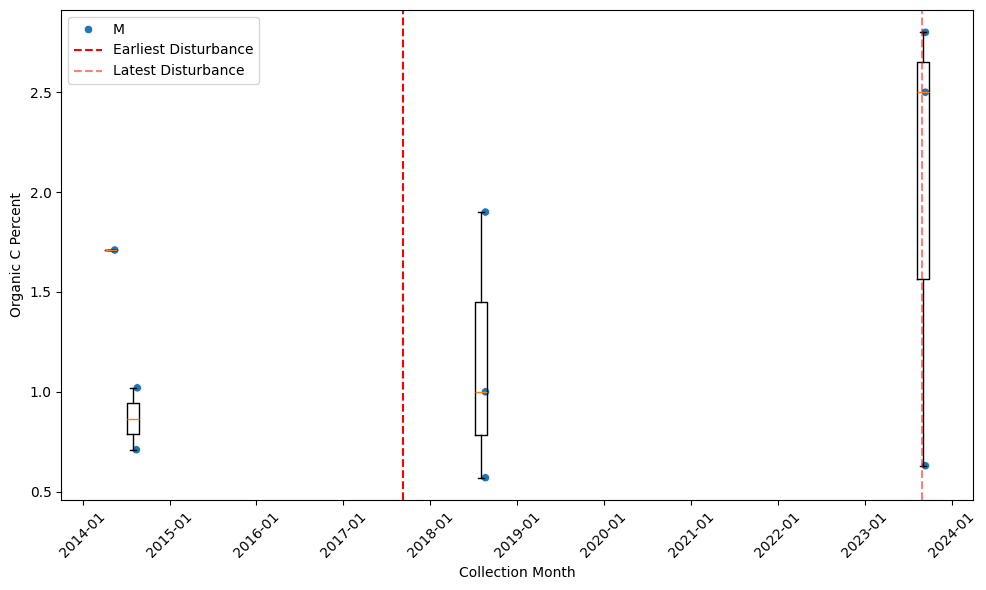

Processing plot: DSNY_003


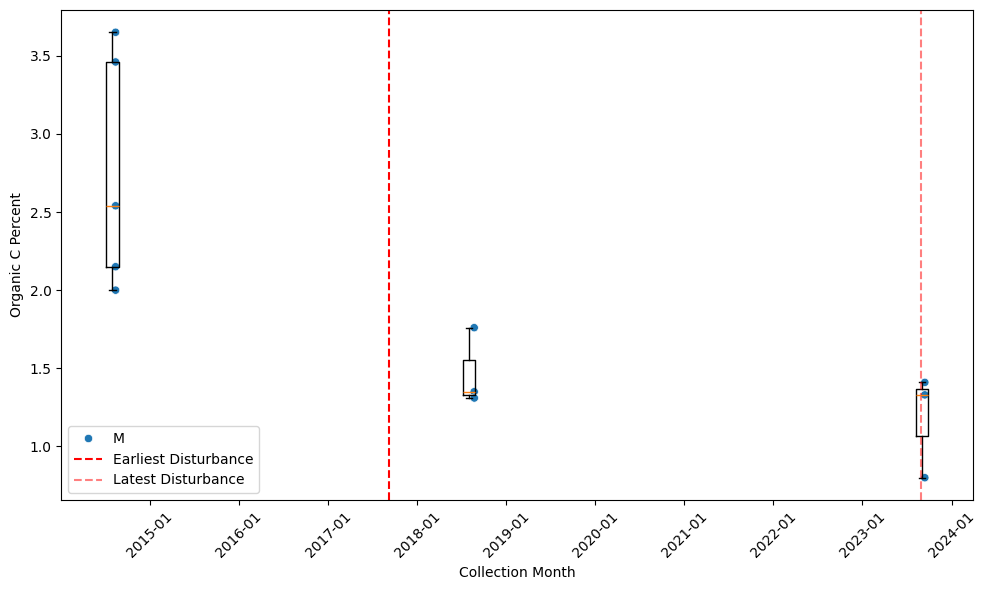

Processing plot: DSNY_001


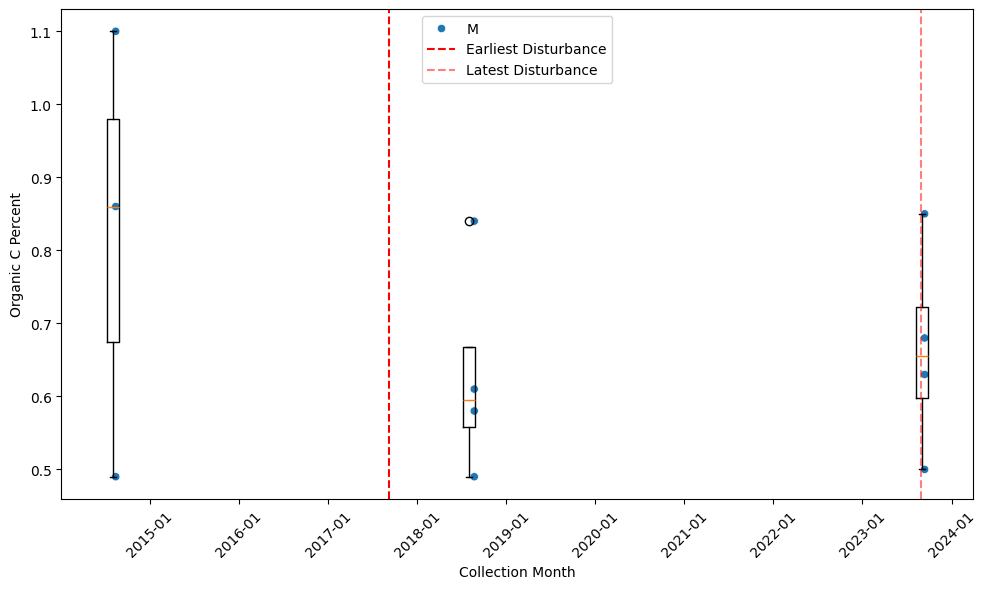

Processing plot: DSNY_009


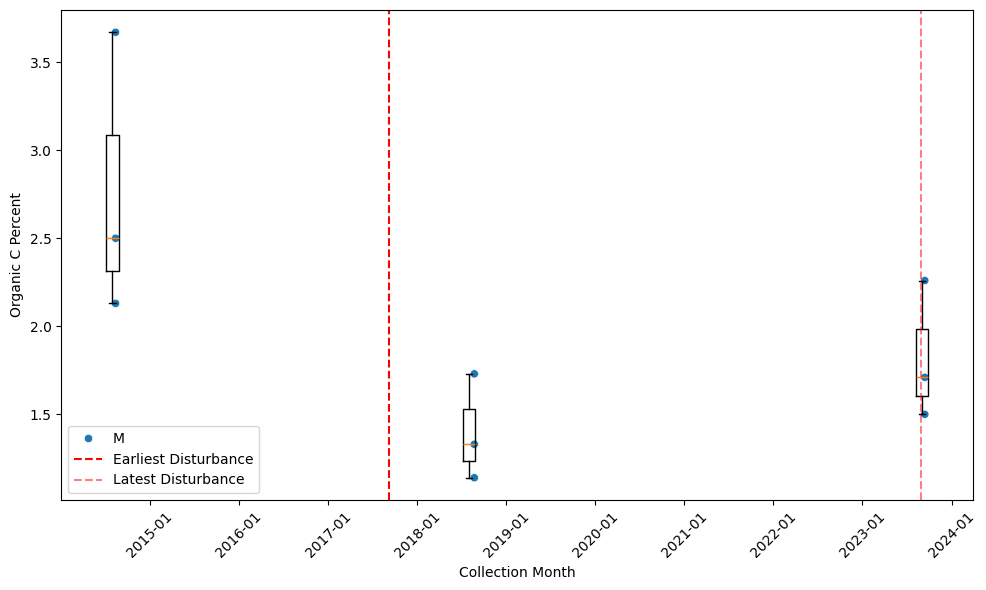

Processing plot: DSNY_004


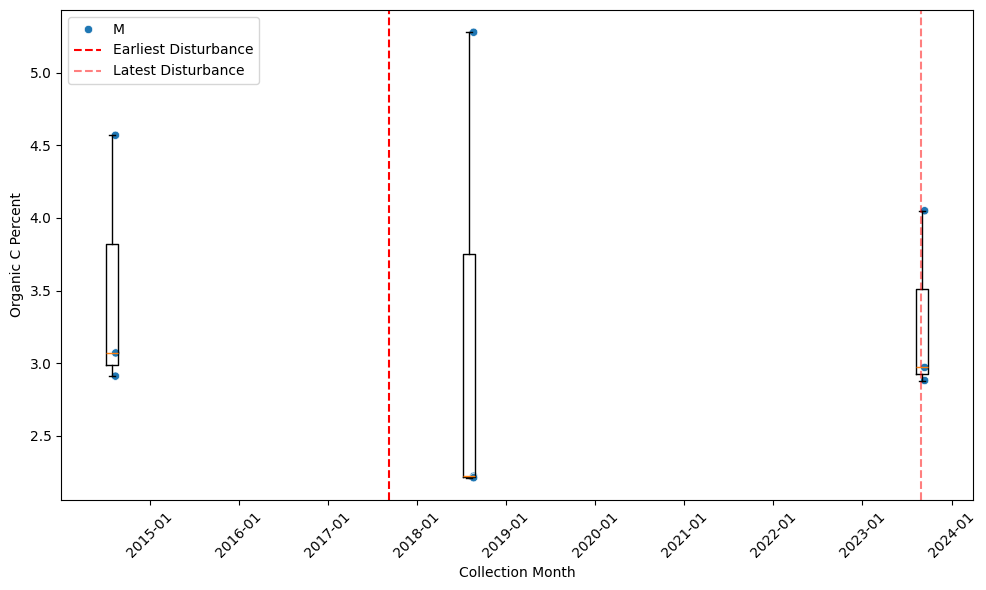

Processing plot: DSNY_043


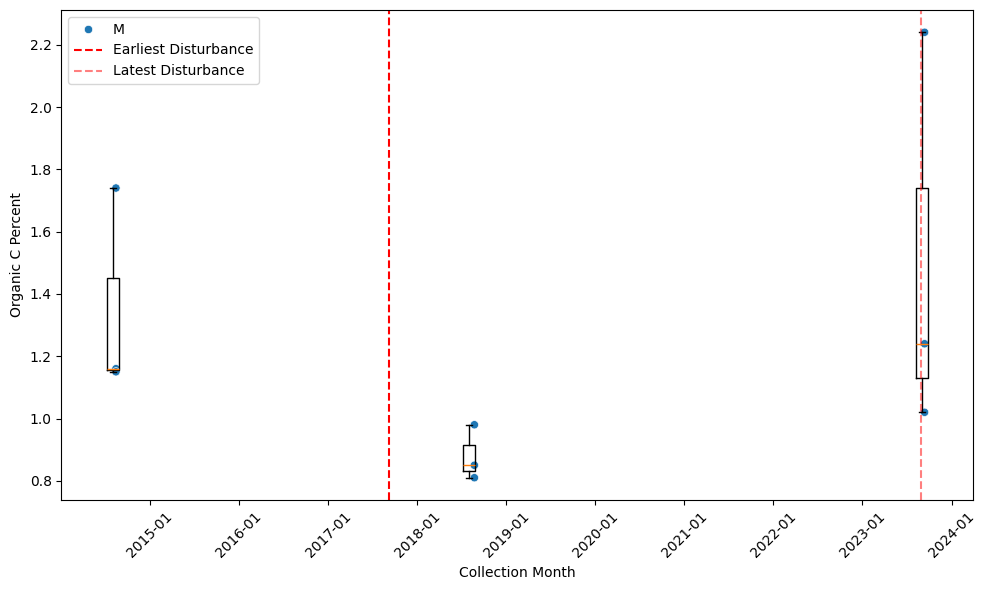

Processing plot: DSNY_044


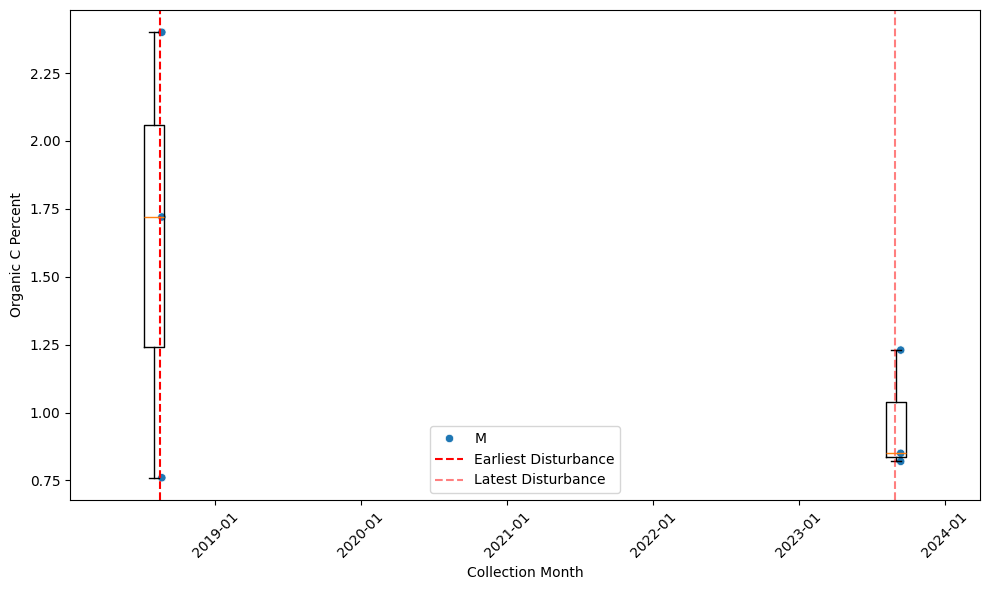

Processing plot: DSNY_042


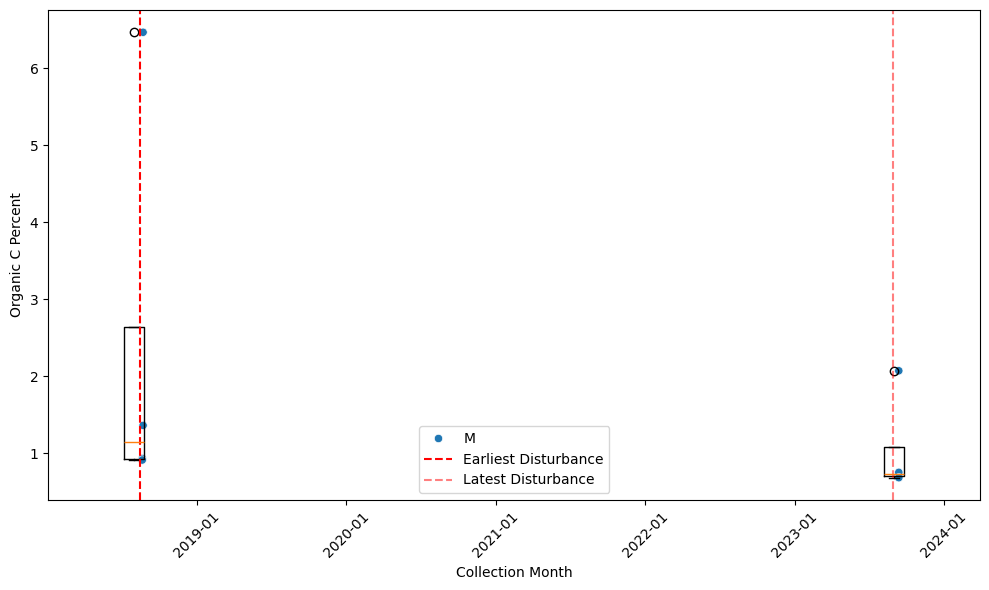

Processing plot: DSNY_006


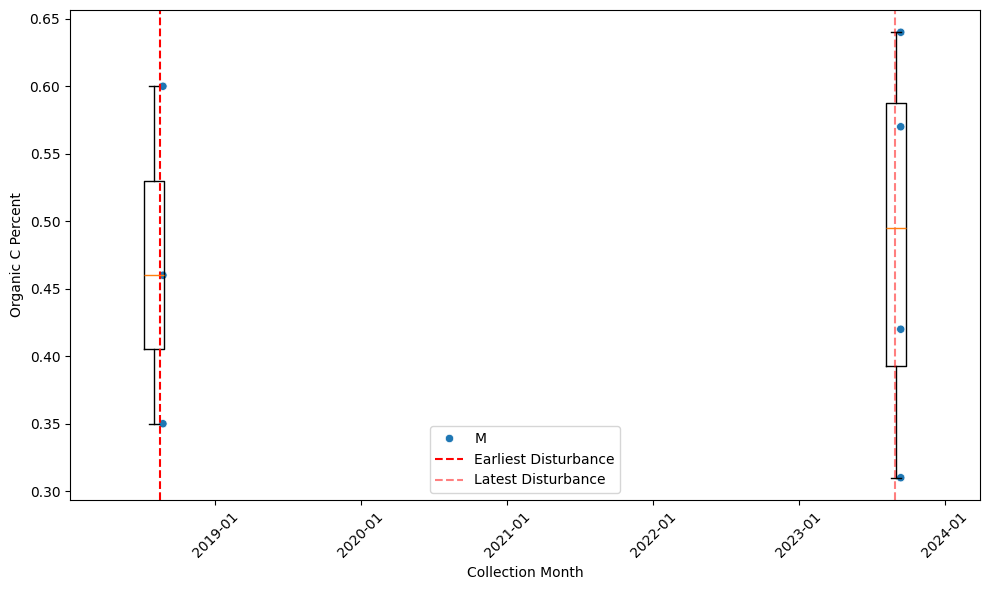

Processing plot: JERC_003


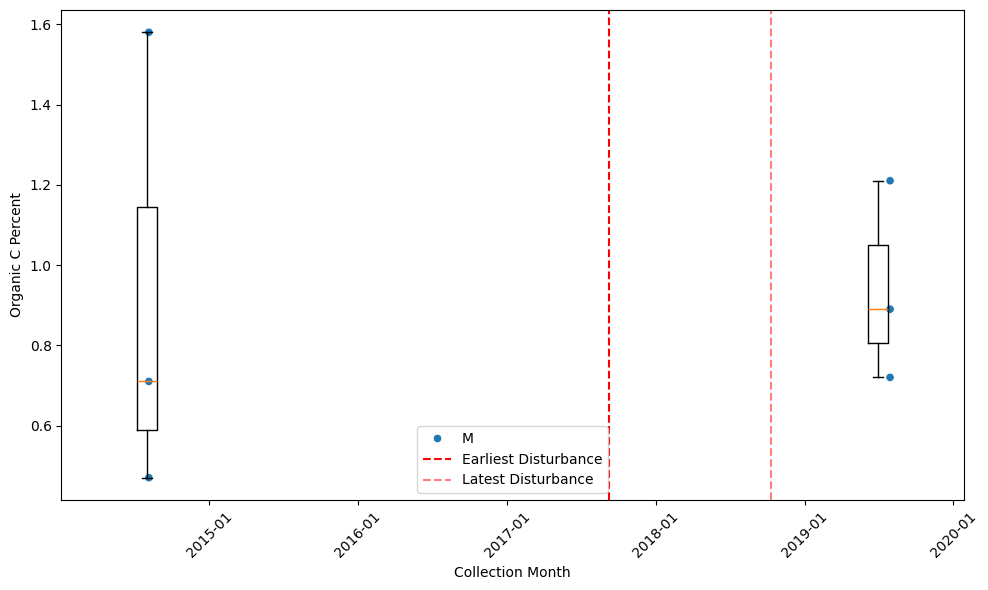

Processing plot: JERC_047


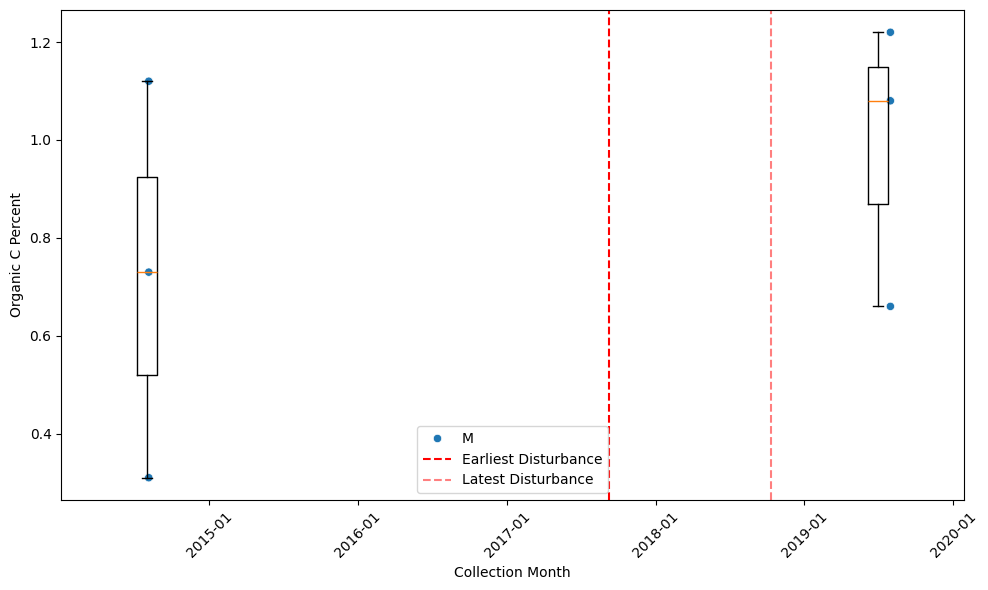

Processing plot: JERC_002


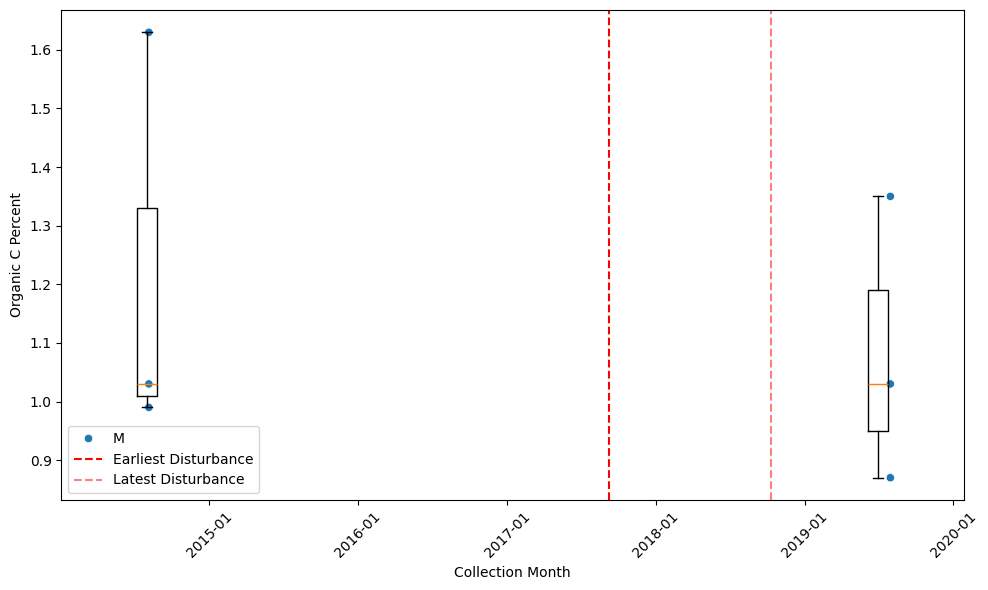

Processing plot: JERC_006


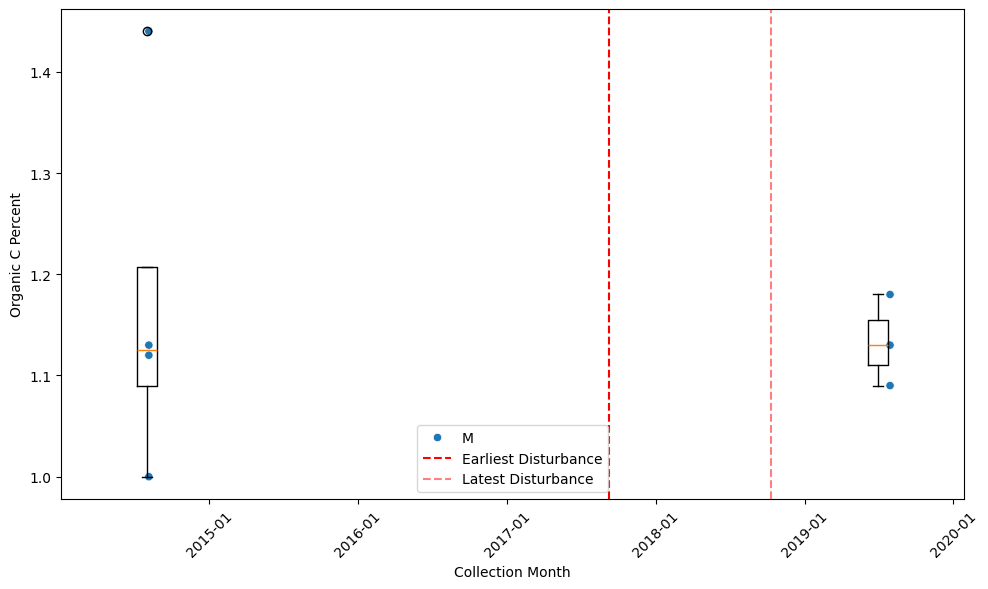

Processing plot: JERC_048


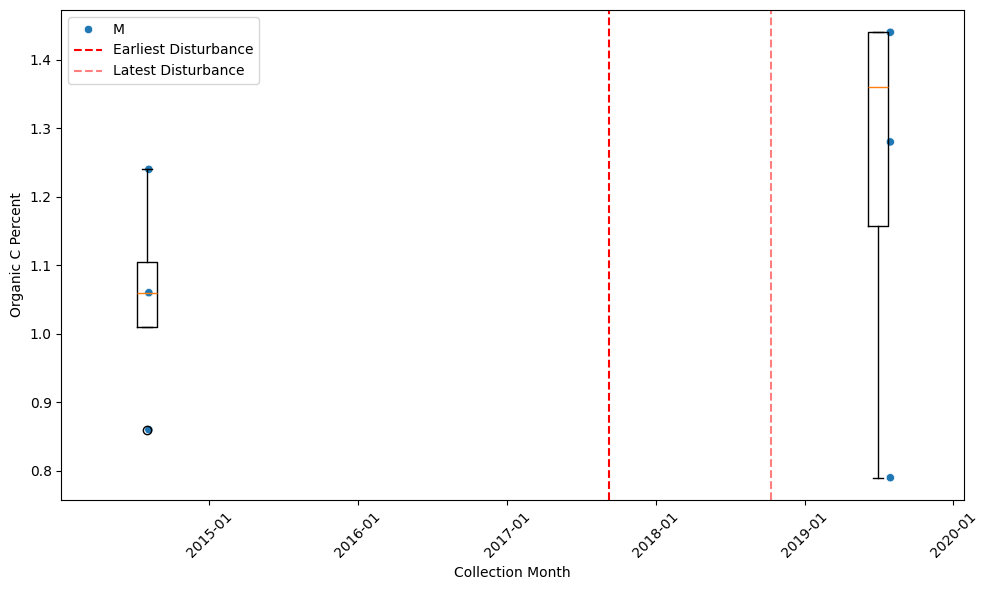

Processing plot: JERC_001


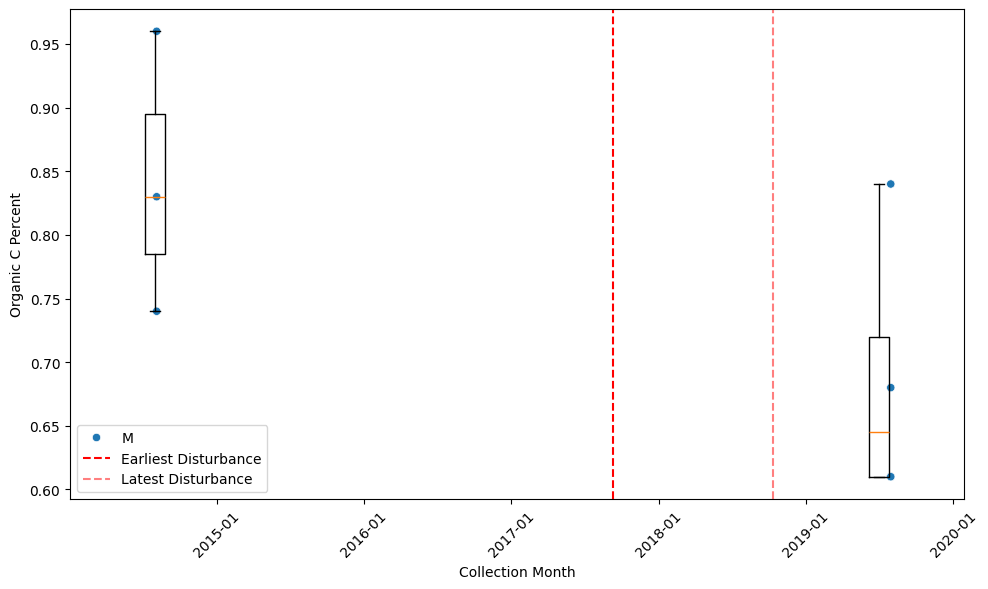

Processing plot: JERC_005


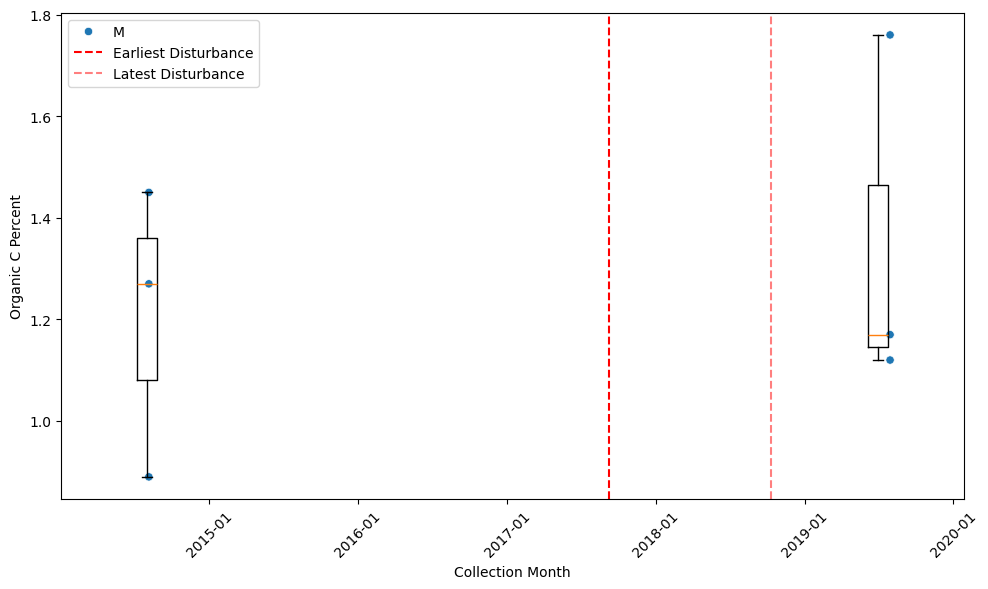

Processing plot: JERC_049


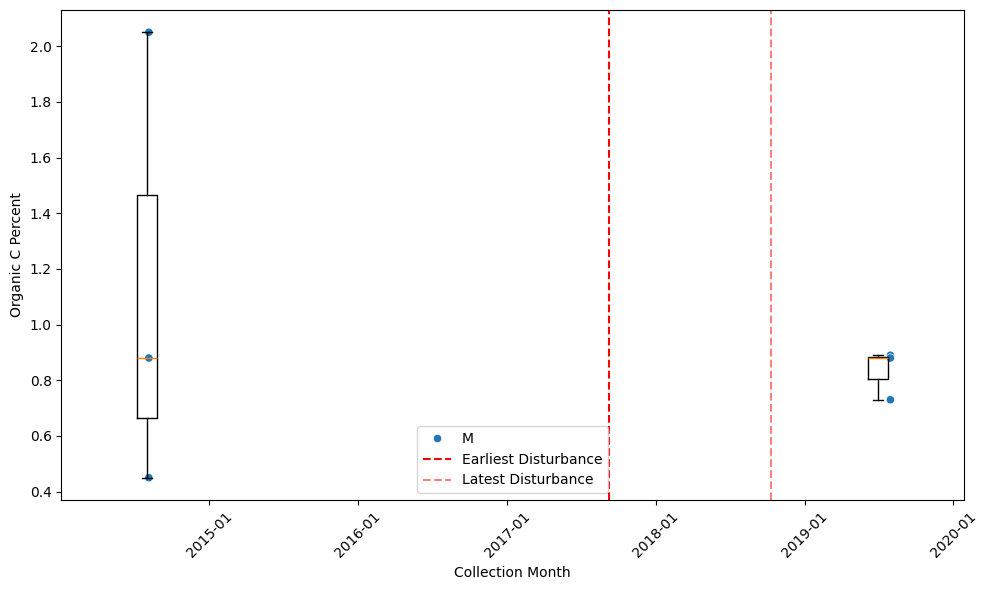

Processing plot: SCBI_045


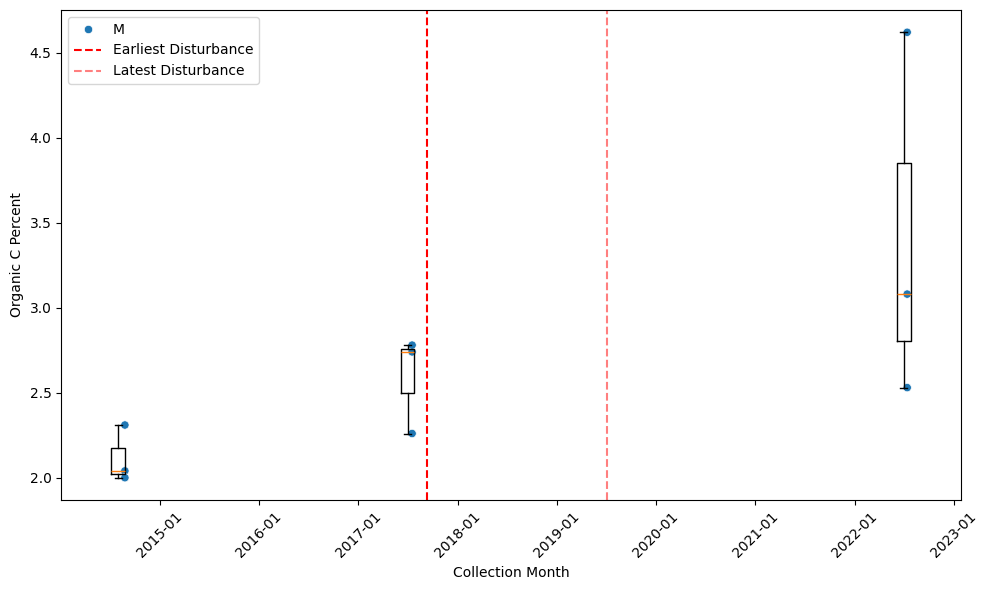

Processing plot: SCBI_004


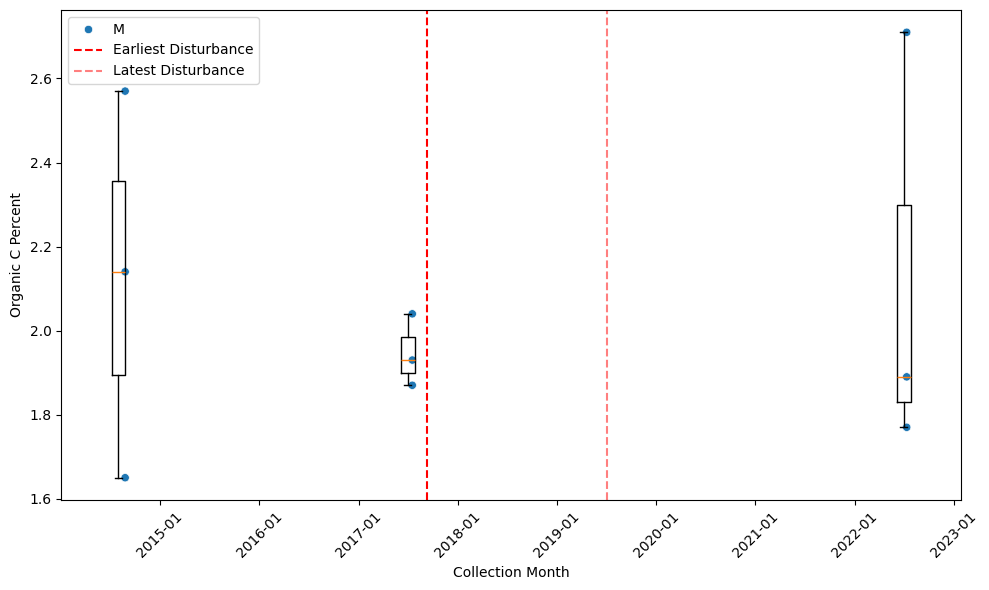

Processing plot: SCBI_006


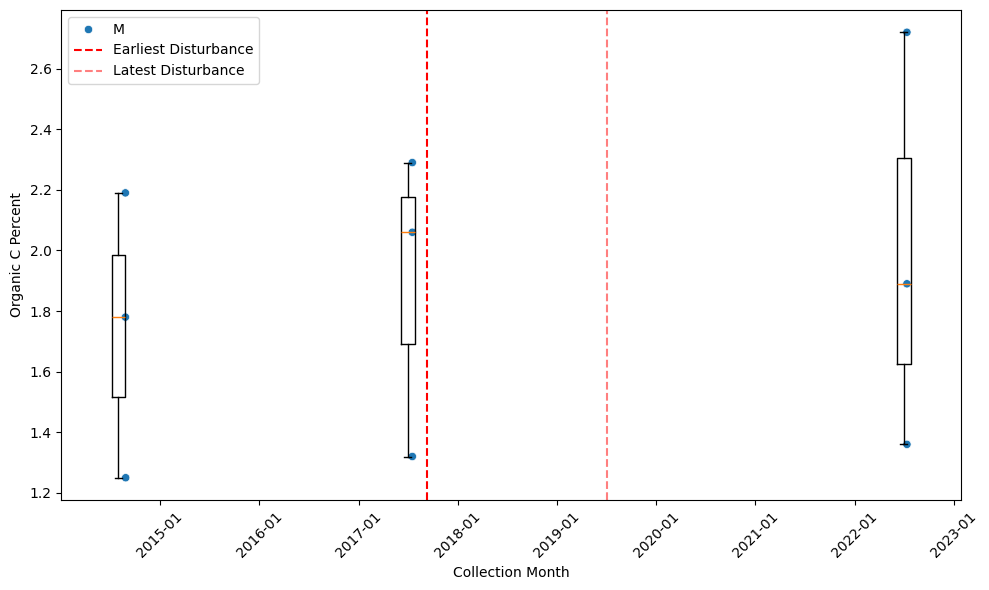

Processing plot: SCBI_003


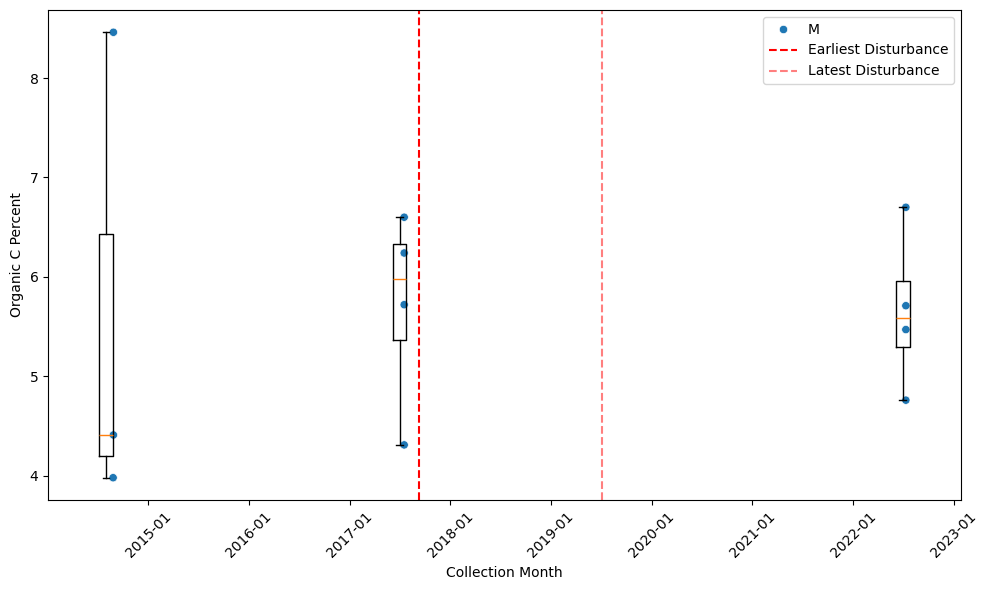

Processing plot: SCBI_005


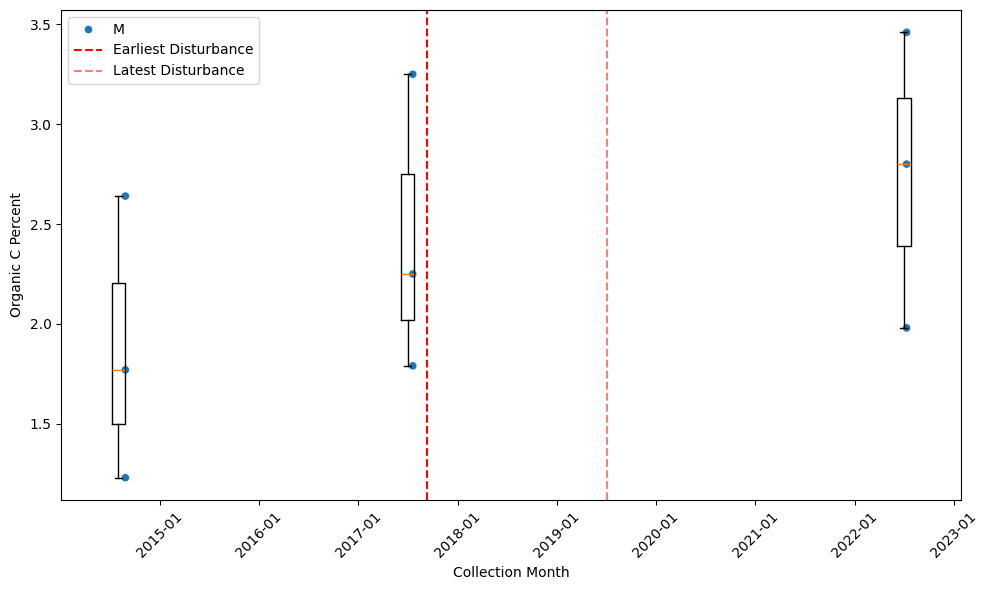

Processing plot: SCBI_067


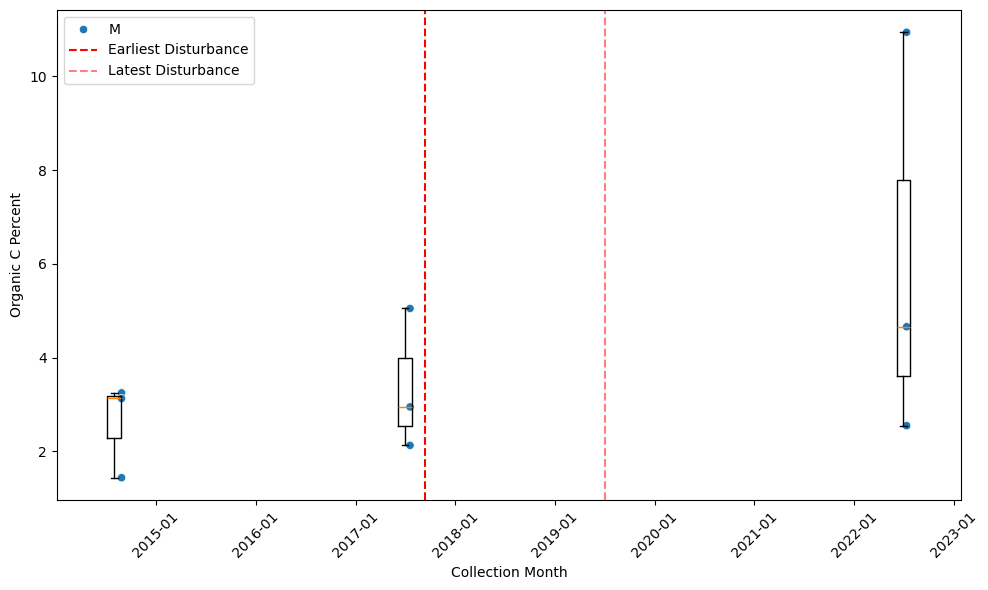

Processing plot: SCBI_049


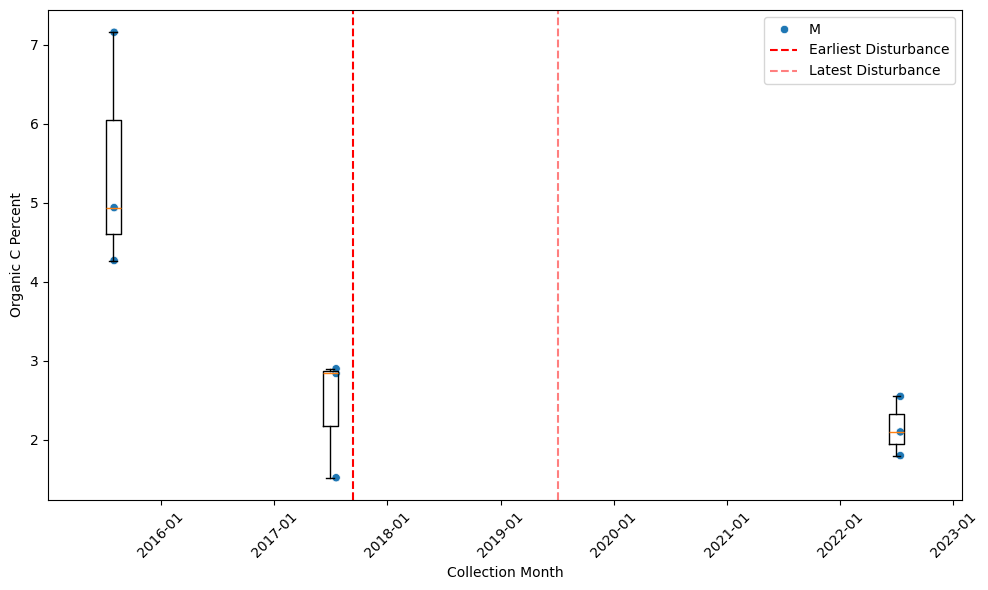

Processing plot: SCBI_047


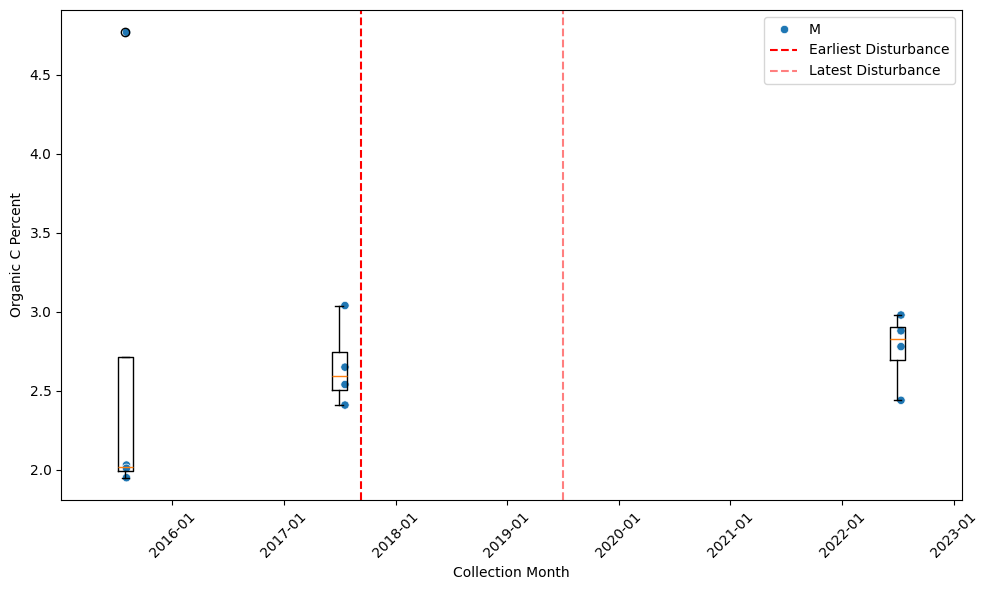

Processing plot: SCBI_008


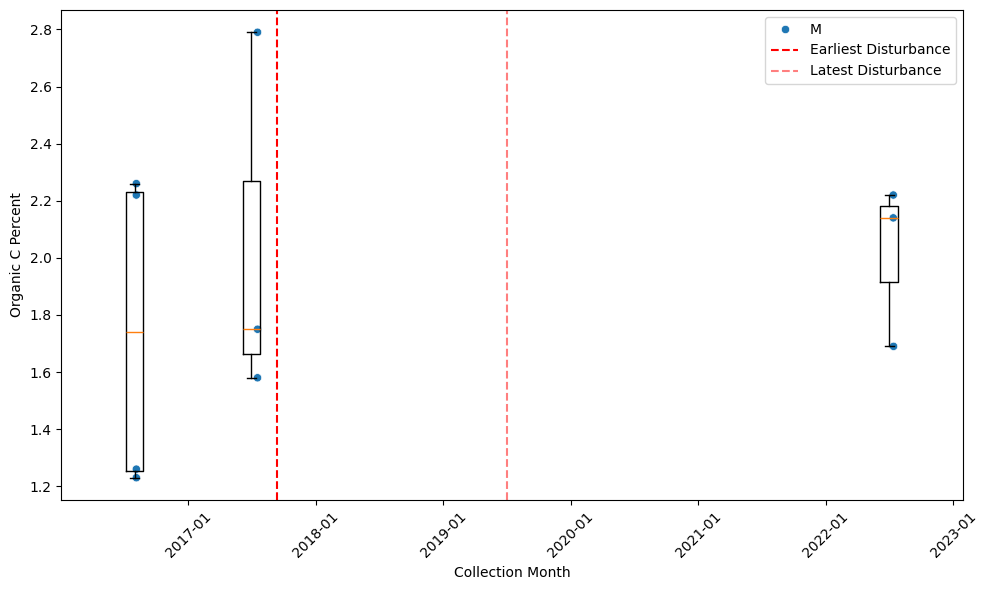

In [4]:
results = []

for plot in valid_plots:
    try:
        print(f"Processing plot: {plot}")
        row = analyze_plot_SOC(plot, chemistry_df, site_disturbance_dates, years_offset=10)
        results.append(row)
    except Exception as e:
        print(f"Failed to process plot {plot}: {e}")

# Convert to DataFrame
final_df = pd.DataFrame(results)
final_df.to_csv("SOC_byPlot_byYear_Grazing.csv", index=False)
